In [1]:
import sys
sys.path.append('/home/jovyan/work/d2l/notebooks/d2l_utils')
import d2l
import torch
import warnings
warnings.filterwarnings("ignore")


class HighDimData(d2l.DataModule):
    def __init__(self, num_train, num_val, num_inputs, batch_size):
        super().__init__()
        self.save_hyperparameters()
        n = num_train + num_val
        self.X = torch.randn(n, num_inputs)
        noise = torch.randn(n, 1) * 0.01
        self.w, self.b = torch.ones(num_inputs, 1) * 0.01, 0.05
        self.y = torch.matmul(self.X, self.w) + self.b + noise

    def get_dataloader(self, train):
        i = slice(0, self.num_train) if train else slice(self.num_train, None)
        return self.get_tensorloader([self.X, self.y], train, i)


class WeightDecayScratch(d2l.LinearRegressScratch):
    def __init__(self, num_inputs, lambd, lr, sigma=0.01):
        super().__init__(num_inputs, lr, sigma)
        self.save_hyperparameters()

    def loss(self, y_hat, y):
        return super().loss(y_hat, y) + self.lambd * d2l.l2_penalty(self.w)
    

class WeightDecay(d2l.LinearRegression):
    def __init__(self, wd, lr):
        super().__init__(lr)
        self.save_hyperparameters()

    def configure_optimizers(self):
        return torch.optim.SGD([{'params': self.net.weight, 'weight_decay': self.wd},
                                {'params': self.net.bias}], lr=self.lr)


def train_strach(lambd, trainer, data):
    model = WeightDecayScratch(num_inputs=200, lambd=lambd, lr=0.01)
    trainer.fit(model, data)
    print(f'l2 norm of w:{d2l.l2_penalty(model.w):.2g}')

/home/jovyan/work/d2l/notebooks/d2l_utils/d2l.py:119: SyntaxWarning: assertion is always true, perhaps remove parentheses?
  assert(self, 'net'), 'Neural network is defined'
/home/jovyan/work/d2l/notebooks/d2l_utils/d2l.py:123: SyntaxWarning: assertion is always true, perhaps remove parentheses?
  assert(self, 'trainer'), 'trainer is not inited'


l2 norm of w:0.0097


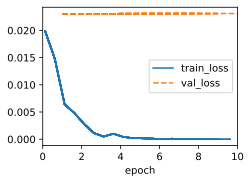

In [2]:
data = HighDimData(num_train=20, num_val=100, num_inputs=200, batch_size=5)
trainer = d2l.Trainer(max_epochs=10)
train_strach(0, trainer, data)

l2 norm of w:0.0013


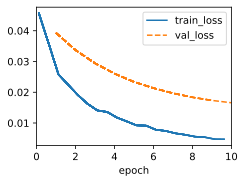

In [3]:
trainer = d2l.Trainer(max_epochs=10)
train_strach(3, trainer, data)

l2 norm of w: 0.0136


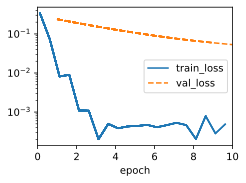

In [9]:
model = WeightDecay(wd=3, lr=0.01)
model.board.yscale = 'log'
trainer = d2l.Trainer(max_epochs=10)
trainer.fit(model, data)
print(f'l2 norm of w: {d2l.l2_penalty(model.net.weight):.4g}')

# 3.7.6. Exercises

## 1. Experiment with the value of $\lambda$ in the estimation problem in this section. Plot training and validation accuracy as a function of $\lambda$. What do you observe?

In [ ]:
data = HighDimData(num_train=20, num_val=100, num_inputs=200, batch_size=5)
model = WeightDecay(wd=3, lr=0.01)
model.board.yscale = 'log'
trainer = d2l.Trainer(max_epochs=10)
trainer.fit(model, data)

## 2. Use a validation set to find the optimal value of 
. Is it really the optimal value? Does this matter?



## 3. What would the update equations look like if instead of 
 we used 
 as our penalty of choice (
 regularization)?



## 4. We know that 
. Can you find a similar equation for matrices (see the Frobenius norm in Section 2.3.11)?



## 5. Review the relationship between training error and generalization error. In addition to weight decay, increased training, and the use of a model of suitable complexity, what other ways might help us deal with overfitting?



## 6. In Bayesian statistics we use the product of prior and likelihood to arrive at a posterior via 
. How can you identify 
 with regularization?